## Insurance Claims Project
EDA and visualization for the insurance-side of the data

In [2]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # custom layouts
from matplotlib import cm
import pandas as pd
from glob import glob
import time

In [3]:
# load data
df = pd.read_csv("/Users/julianschmitt/Documents/Schoolwork/Senior/STAT175/FimaNfipClaims.csv")

In [15]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'reportedCity', 'condominiumIndicator', 'policyCount', 'countyCode',
       'communityRatingSystemDiscount', 'dateOfLoss',
       'elevatedBuildingIndicator', 'elevationCertificateIndicator',
       'elevationDifference', 'censusTract', 'floodZone', 'houseWorship',
       'latitude', 'locationOfContents', 'longitude', 'lowestAdjacentGrade',
       'lowestFloorElevation', 'numberOfFloorsInTheInsuredBuilding',
       'nonProfitIndicator', 'obstructionType', 'occupancyType',
       'originalConstructionDate', 'originalNBDate',
       'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'primaryResidence', 'id', 'basementEnclosureCrawlspace',
       'report

(array([ 7249., 11566., 16992., 24965., 47513., 47527., 69235., 16399.,
        48778., 22082.]),
 array([1975. , 1979.7, 1984.4, 1989.1, 1993.8, 1998.5, 2003.2, 2007.9,
        2012.6, 2017.3, 2022. ]),
 <BarContainer object of 10 artists>)

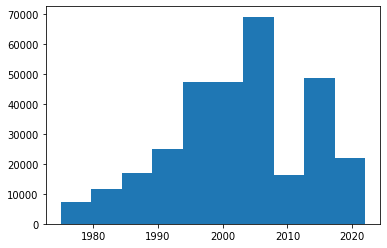

In [10]:
plt.hist(df[(df['state'] =="FL")].yearOfLoss)

In [4]:
np.unique(df.yearOfLoss)

array([1970, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

/Users/julianschmitt/opt/anaconda3/envs/noaa/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/noaa/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/julianschmitt/opt/anaconda3/envs/noaa/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.99130e+04, 9.25000e+02, 1.15970e+04, 1.00994e+05, 3.58783e+05,
        6.17929e+05, 5.73003e+05, 2.15666e+05, 5.08400e+03, 7.20000e+01]),
 array([0.        , 0.7       , 1.40000001, 2.10000001, 2.80000002,
        3.50000002, 4.20000003, 4.90000003, 5.60000003, 6.30000004,
        7.00000004]),
 <a list of 10 Patch objects>)

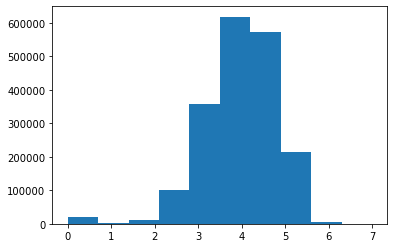

In [5]:
plt.hist(np.log10(1+df.amountPaidOnBuildingClaim))

In [5]:
sum(~np.isnan(df.amountPaidOnBuildingClaim))

1904040

In [6]:
np.unique(df.latitude)

array([-36. , -14.3,  13.3, ...,   nan,   nan,   nan])

In [7]:
s = df.groupby(['latitude', 'longitude']).sum().reset_index()

In [1]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature # for plotting HUC2 regions
from cartopy.io.shapereader import Reader

ModuleNotFoundError: No module named 'geopandas'

In [9]:
states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=1)

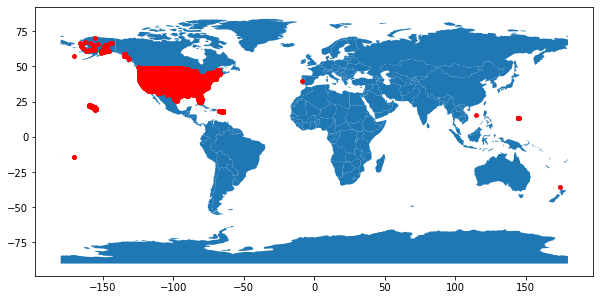

In [10]:
geometry = [Point(xy) for xy in zip(s['longitude'], s['latitude'])]
gdf = GeoDataFrame(s, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [11]:
df.dateOfLoss[0][0:10]

'2007-01-01'

In [12]:
from datetime import datetime
datetime.strptime(df.dateOfLoss[0][0:10], "%Y-%M-%d")

datetime.datetime(2007, 1, 1, 0, 1)

In [13]:
df_new = df.copy()
df_new.dateOfLoss = [datetime.strptime(df.dateOfLoss[i][0:10], "%Y-%M-%d") for i in range(len(df))]

In [14]:
df_new['date'] = df_new.dateOfLoss
df_new = df_new.set_index(['date'])

In [20]:
# look at a small time window
small_t_window = df_new.loc['2016-08-01':'2018-01-01']

<ipython-input-20-7aee8355ba22>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  small_t_window = df_new.loc['2016-08-01':'2018-01-01']


In [21]:
small_t_window.dateOfLoss

date
2017-01-28 00:08:00   2017-01-28 00:08:00
2017-01-27 00:08:00   2017-01-27 00:08:00
2017-01-11 00:09:00   2017-01-11 00:09:00
2017-01-10 00:09:00   2017-01-10 00:09:00
2017-01-08 00:09:00   2017-01-08 00:09:00
                              ...        
2017-01-30 00:08:00   2017-01-30 00:08:00
2017-01-10 00:09:00   2017-01-10 00:09:00
2017-01-26 00:08:00   2017-01-26 00:08:00
2017-01-11 00:09:00   2017-01-11 00:09:00
2017-01-23 00:06:00   2017-01-23 00:06:00
Name: dateOfLoss, Length: 148365, dtype: datetime64[ns]

In [22]:
small_summed = small_t_window.groupby(["latitude", "longitude"]).sum().reset_index()
small_summed[["latitude", "longitude", "amountPaidOnBuildingClaim"]]
#plt.hist(np.log10(1+small_summed.amountPaidOnBuildingClaim))

,latitude,longitude,amountPaidOnBuildingClaim
0,13.4,144.6,10750.34
1,17.7,-64.9,3282381.39
2,17.7,-64.8,873683.32
3,17.7,-64.7,4054944.29
4,17.7,-64.6,512298.92
...,...,...,...
5196,48.9,-122.8,0.00
5197,49.0,-116.2,0.00
5198,57.1,-135.3,0.00
5199,58.4,-134.6,31962.91


In [18]:
small_summed.shape

(327, 30)

/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-pack

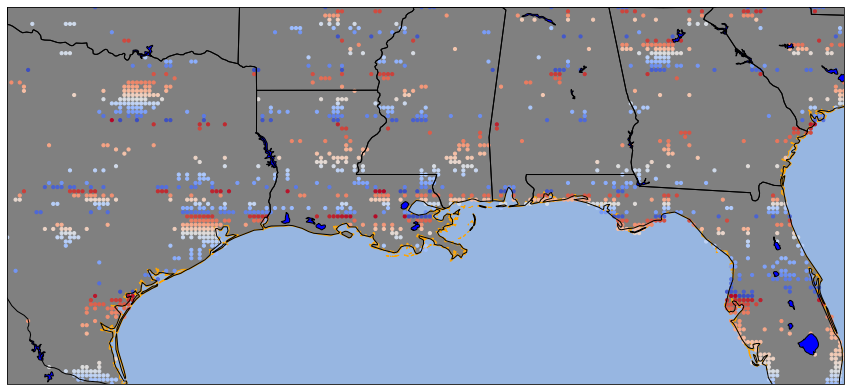

In [137]:
plt.figure(figsize=(15,15))

# compute points
geometry = [Point(xy) for xy in zip(small_summed['longitude'], small_summed['latitude'])]
gdf = GeoDataFrame(small_summed, geometry=geometry)   

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
# add states 
ax.add_feature(states)

gdf.plot(ax=ax, marker='o', c=np.log10(small_summed["amountPaidOnBuildingClaim"]), 
         markersize=10, alpha = 1, cmap=plt.cm.coolwarm)

#ax.set_extent((-130, -67, 24, 53), crs=ccrs.PlateCarree())
ax.set_extent((-100, -80, 26, 35), crs=ccrs.PlateCarree())



/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


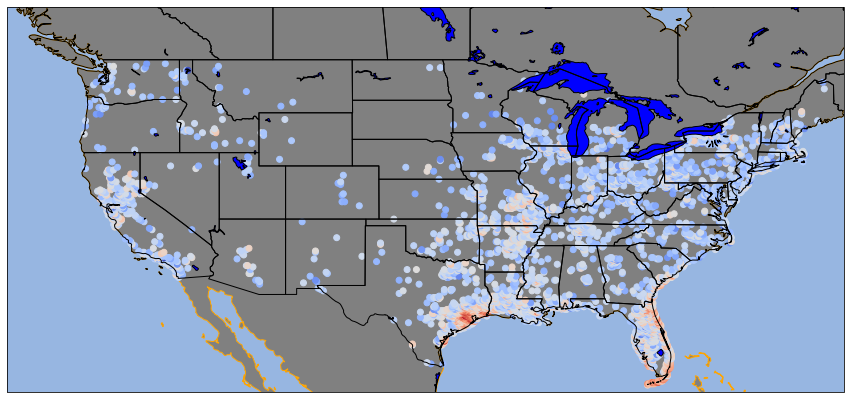

In [23]:
plt.figure(figsize=(15,15))

# compute points
geometry = [Point(xyz) for xyz in zip(small_summed['longitude'], 
                                      small_summed['latitude'])]
gdf = GeoDataFrame(small_summed, geometry=geometry)   
gdf["color"] = small_summed["amountPaidOnBuildingClaim"]
# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
# add states 
ax.add_feature(states)

# gdf.plot(ax=ax, marker='o', c=np.log10(gdf.color), 
#          markersize=10, alpha = 1, cmap=plt.cm.coolwarm)
cmap=plt.cm.coolwarm
sm = plt.cm.ScalarMappable(cmap=cmap)

ax.scatter(x = small_summed['longitude'], y = small_summed['latitude'], 
           c = np.log10(small_summed['amountPaidOnBuildingClaim']), cmap = cmap)



#ax.set_extent((-100, -85, 24, 35), crs=ccrs.PlateCarree())
ax.set_extent((-130, -67, 24, 53), crs=ccrs.PlateCarree())
#plt.colorbar(sm, cax=ax)